# Part A: Data Exploration and Baseline Model

Main question: ``How do you compose the clustering algorithm such that classification works better?``

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load and Analyze Dataset

Load the creditcard.csv dataset. This dataset has already been pre-processed using PCA, so no feature engineering is required. 

In [2]:
dataset = pd.read_csv("datasets/creditcard.csv")

In [3]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


Looks like the dataset is centered. It is also known from the dataset description that PCA has been applied to the dataset. This means the first feature `V1` is the first principal component with maximum explained variance

In [5]:
dataset["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

This clearly shows data imbalance.

##  Analyze Class Distribution

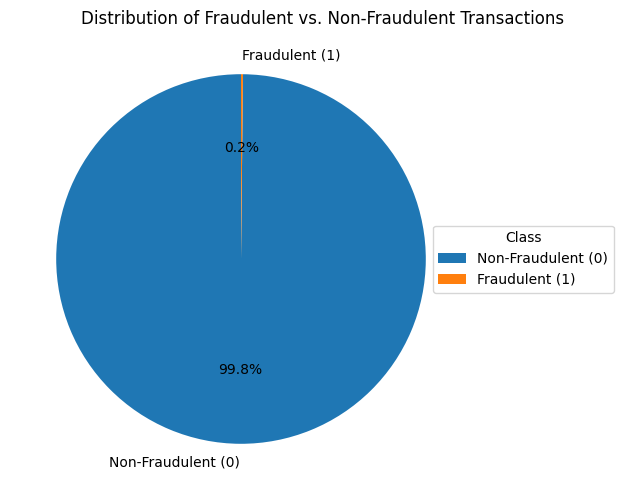

In [6]:
class_counts = dataset['Class'].value_counts()
labels = ['Non-Fraudulent (0)', 'Fraudulent (1)']

plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions', loc="right", pad=1, x=1.2)
plt.legend(loc='center left', bbox_to_anchor=(0.9, 0.5), title='Class')

In [7]:
print("Class Distribution:")
print(class_counts)
print("*"*50)
imbalance_ratio = class_counts[0] / class_counts[1] if 1 in class_counts else 'Infinite (no fraud cases)'
print(f"Degree of Imbalance: {imbalance_ratio:.2f}:1 (Non-Fraud:Fraud)")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
**************************************************
Degree of Imbalance: 577.88:1 (Non-Fraud:Fraud)


The degree of imbalance `577.88:1 (Non-Fraud:Fraud)` is very high

In [8]:
import plotly.graph_objects as go
import pandas as pd

# Assuming 'dataset' is your pandas DataFrame with the 'Class' column (0 for non-fraud, 1 for fraud)
class_counts = dataset['Class'].value_counts()
total_transactions = len(dataset)

labels = ["All Transactions", "Non-Fraud", "Fraud"]
source = [0, 0]  # All transactions split into non-fraud and fraud
target = [1, 2]  # Non-fraud and fraud nodes
value = [class_counts[0], class_counts[1]]  # Actual counts for non-fraud and fraud

fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=5,
        line=dict(color="black", width=0.5),
        label=labels,
        color="blue"
    ),
    link=dict(
        source=source,
        target=target,
        value=value
    )
)])

fig.update_layout(
    title_text="Transactions to Fraudulent vs. Non-Fraudulent Transactions",
    font_size=11,
    width=500,
    height=400
)
fig.show()

These analyses show clearly how imbalanced the dataset is.

##  Baseline Model

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [10]:

X = dataset.drop("Class", axis=1)
y = dataset.pop("Class")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, shuffle=True,
                                                    stratify=y)

In [11]:
baseline_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])

In [12]:
baseline_model_pipeline.fit(X_train, y_train)

y_pred = baseline_model_pipeline.predict(X_test)

Text(0.5, 1.02, 'Confusion Matrix of Baseline Model')

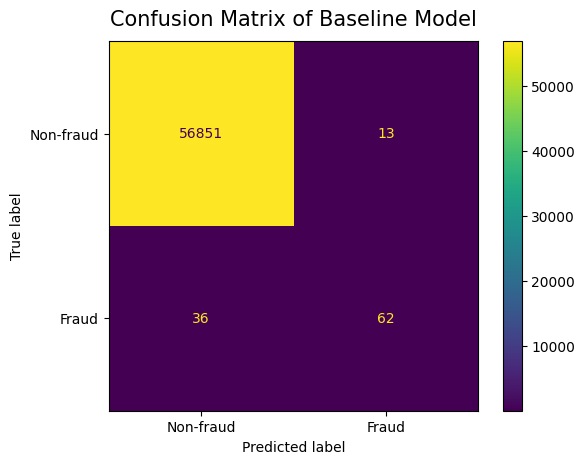

In [13]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of Baseline Model",  fontsize=15, y=1.02)

In [14]:
precision_base_model = precision_score(y_test, y_pred)
recall_base_model = recall_score(y_test, y_pred)
accuracy_base_model = accuracy_score(y_test, y_pred)
f1_base_model = f1_score(y_test, y_pred)

print("The metrics of the baseline model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_base_model)
print("Precision : ", precision_base_model)
print("Recall : ", recall_base_model)
print("F1 Score : ", f1_base_model)

The metrics of the baseline model for predicting Fraudulent transactions are: 

Accuracy :  0.9991397773954567
Precision :  0.8266666666666667
Recall :  0.6326530612244898
F1 Score :  0.7167630057803468


This shows very clearly that the model is very effective in terms of accuracy and has fairly decent precision. But looking at recall, the model is not effective at all. Here are a few specific observations that signify this.

1. Accuracy close to 1 signifies that accuracy is highly influenced by the number of datapoints
    - This wrongly indicates that the model is doing great
2. Precision of ~0.83 shows that out of all the datapoints predicted to be fraud, only ~83% of them were actually fraud. 
    - Which again is not bad but it is not representative of the truth
3. Recall of ~0.63 shows that out of all the fraudulent transactions, only ~63% of them were correctly predicted as fraud by the model.
    - This is the most relevant metric of all as it clearly shows the real performance of the model.
    - It is important because we care far more about finding fraudulent transactions than we do about non-fraudulent ones
4. F1 score is a function of precision and recall.
    - It also isn't very indicative of the model performance but definitely does a better job than accuracy.

This is also clear from the confusion matrix. 

# Part B: Resampling Approaches

## Naive Oversampling (SMOTE)

SMOTE (Synthetic Minority Over-sampling Technique) addresses class imbalance in datasets by generating synthetic minority class samples. This should help improve classifier performance on rare events like fraud detection. Developed by Chawla et al. (2002), it creates new samples by interpolating between existing minority instances and their k-nearest neighbors. For a minority sample $ x_i $, SMOTE selects a neighbor $ x_{nn} $, then generates a synthetic point $ x_{syn} = x_i + \lambda \cdot (x_{nn} - x_i) $, where $ \lambda \in [0,1] $ is random. This expands the minority class region, avoiding overfitting from simple duplication.

However, SMOTE has limitations. 
1. Generation of Noisy or Unrealistic Samples: When the minority class is poorly defined due to noise, outliers, or ambiguous boundaries, SMOTE may produce synthetic samples that are unrealistic, misleading the classifier and increasing false positives.
2. Assumption of Local Linearity: SMOTE relies on linear interpolation between minority samples, which fails in datasets with non-linear manifolds or complex geometries, potentially creating samples outside the true data distribution.
3. Challenges in High-Dimensional Data: In high-dimensional spaces, sparse data distributions make nearest neighbors less reliable, leading to synthetic samples that poorly represent the minority class.
4. Ignoring Majority Class Distribution: SMOTE focuses solely on the minority class, disregarding the majority class structure, which can result in synthetic samples overlapping with majority regions, blurring decision boundaries.
5. Risk of Overfitting: By generating synthetic samples near existing ones, SMOTE can cause the classifier to overfit, especially in small datasets, as models may memorize overly specific minority class patterns.
6. Computational Cost: Calculating k-nearest neighbors for large datasets is computationally expensive, particularly with naive implementations, though optimized data structures like KD-trees can mitigate this.

To counter these, combining SMOTE with cleaning methods (e.g., Edited Nearest Neighbors) or ensemble techniques helps. Careful validation using AUC-ROC or precision-recall metrics is essential to ensure SMOTE enhances performance. While powerful, SMOTE demands domain expertise to navigate its pitfalls, particularly when minority class structure is unclear.

In [15]:
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [16]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning:

`BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.



In [17]:
print("Original training set class distribution:\n", y_train.value_counts())
print("SMOTE resampled training set class distribution:\n", pd.Series(y_train_smote).value_counts())

Original training set class distribution:
 Class
0    227451
1       394
Name: count, dtype: int64
SMOTE resampled training set class distribution:
 Class
0    227451
1    227451
Name: count, dtype: int64


In [18]:
smote_model_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [19]:
smote_model_pipeline.fit(X_train_smote, y_train_smote)

y_pred_smote = smote_model_pipeline.predict(X_test)

Text(0.5, 1.02, 'Confusion Matrix of SMOTE Model')

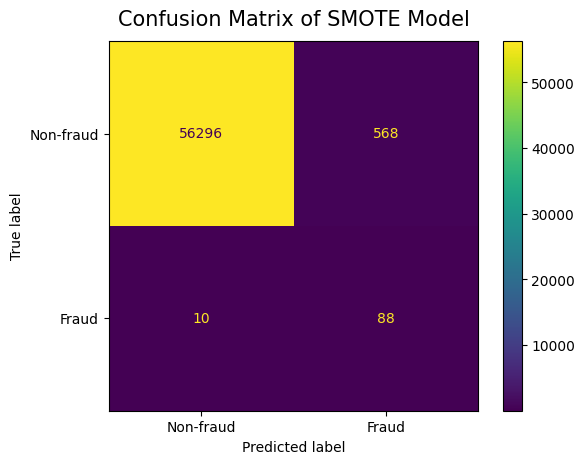

In [20]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_smote, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of SMOTE Model",  fontsize=15, y=1.02)

In [21]:
precision_smote_model = precision_score(y_test, y_pred_smote)
recall_smote_model = recall_score(y_test, y_pred_smote)
accuracy_smote_model = accuracy_score(y_test, y_pred_smote)
f1_smote_model = f1_score(y_test, y_pred_smote)

print("The metrics of the SMOTE model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_smote_model)
print("Precision : ", precision_smote_model)
print("Recall : ", recall_smote_model)
print("F1 Score : ", f1_smote_model)

The metrics of the SMOTE model for predicting Fraudulent transactions are: 

Accuracy :  0.9898528843790597
Precision :  0.13414634146341464
Recall :  0.8979591836734694
F1 Score :  0.23342175066312998


This shows that the SMOTE model has significantly altered the performance metrics compared to the baseline, reflecting the impact of oversampling the minority class. Here are a few specific observations that signify this:

1. **Accuracy** dropping by around 1% indicates a trade-off due to the synthetic oversampling of the minority class.
    - This suggests the model is less focused on overall correctness and more on balancing the classes, which is expected but reduces the misleadingly high accuracy seen in the baseline.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~13% were actually fraud.
    - This is quite low, indicating a **high number of false positives**, which might be a downside of aggressive oversampling.
3. **Recall** shows that out of all the fraudulent transactions, ~90% were correctly predicted as fraud by the model.
    - This is a substantial improvement over the baseline and is the most relevant metric here, as it highlights the model's **enhanced ability to detect fraudulent transactions**, which is critical for a fraud detection system.
    - It is important because the primary goal is to identify as many fraudulent cases as possible, even at the cost of precision.
4. **F1 score**, again, being a harmonic mean of precision and recall, reflects the imbalance between the two metrics.
    - It indicates a moderate overall performance but underscores the challenge of balancing precision and recall in this scenario, performing better than accuracy as a holistic measure.

This is also clear from the confusion matrix, which shows an increase in true positives and false positives due to the oversampling.

## Clustering-Based Oversampling

Clustering-based oversampling (CBO) leverages unsupervised learning to enhance the diversity of the minority class in imbalanced datasets, ensuring a more representative training set for classification tasks like fraud detection.
- **Diversity of data**: By applying a clustering algorithm (e.g., K-Means) to the minority class, CBO identifies distinct subgroups or clusters within the data, capturing underlying patterns or variations that might be overlooked by uniform oversampling methods.
- **Goal oriented**: Each cluster is oversampled individually, generating synthetic samples within the boundaries of existing clusters rather than randomly across the feature space. This approach ensures that synthetic data points are created in regions with actual minority class instances, preserving the natural distribution and diversity of the minority class.
- **Reduces Overgeneralization**: Unlike naive methods like SMOTE, which may produce noisy samples in sparse or undefined regions, CBO limits synthetic sample generation to cluster-specific areas, reducing the risk of overfitting and improving model generalization.
- **Balanced Representation**: By ensuring all subgroups are adequately represented through targeted oversampling, CBO creates a balanced dataset that better reflects the minority class’s complexity, enhancing the classifier’s ability to detect rare events like fraudulent transactions.

In [22]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

### K means based

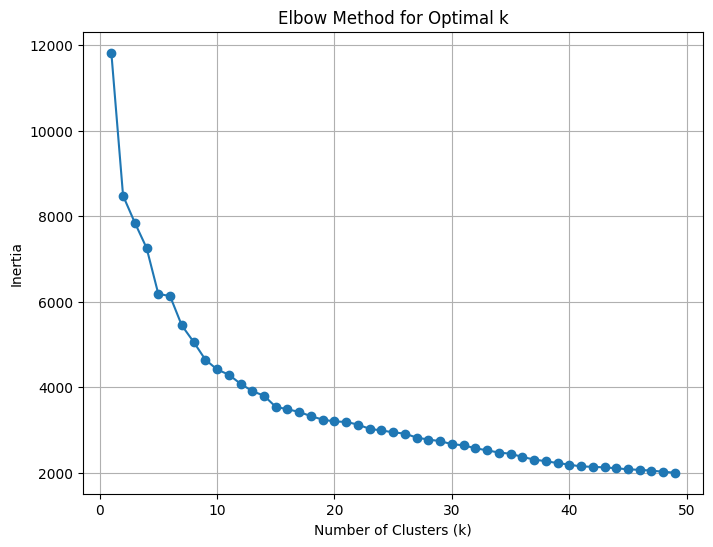

In [23]:
minority_mask = y_train == 1
X_minority = X_train[minority_mask].copy()
y_minority = y_train[minority_mask].copy()

# Scale the minority class data and determine optimal k with Elbow Method
scaler = StandardScaler()
X_minority_scaled = scaler.fit_transform(X_minority)

inertia = []
k_range = range(1, 50)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=24)
    kmeans.fit(X_minority_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

In [24]:
optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=24)
kmeans_labels = kmeans.fit_predict(X_minority_scaled)

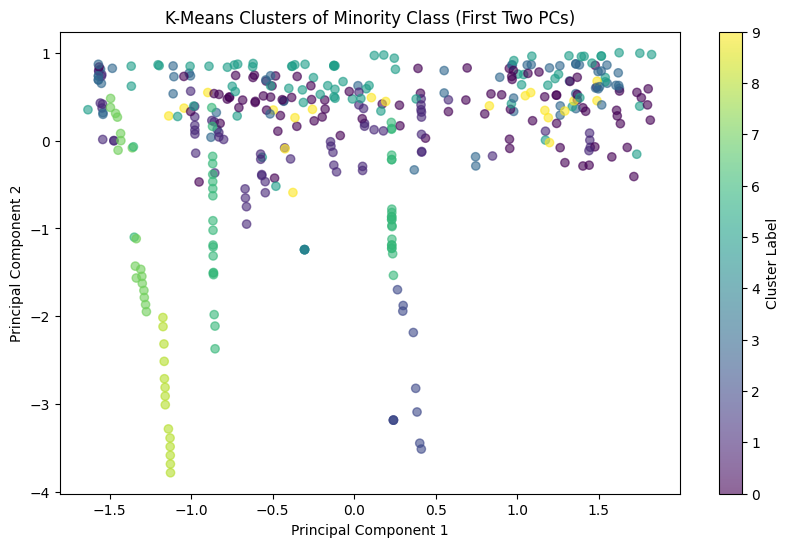

In [25]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_minority_scaled[:, 0], X_minority_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters of Minority Class (First Two PCs)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')

In [26]:
# Combine minority data with cluster labels and oversample
X_minority_df = pd.DataFrame(X_minority_scaled, columns=[f'feature_{i}' for i in range(X_minority_scaled.shape[1])])
X_minority_df['cluster'] = kmeans_labels
X_minority_df['target'] = y_minority.values

majority_count = (y_train == 0).sum()
target_per_cluster = majority_count // optimal_k
X_resampled_list = []
y_resampled_list = []

for cluster in range(optimal_k):
    cluster_mask = X_minority_df['cluster'] == cluster
    X_cluster = X_minority_df[cluster_mask].drop(['cluster', 'target'], axis=1).values
    y_cluster = X_minority_df[cluster_mask]['target'].values
    if len(X_cluster) > 0:
        # Resample with replacement and add small noise
        if len(X_cluster) < target_per_cluster:
            n_samples = target_per_cluster - len(X_cluster)
            X_synthetic, y_synthetic = resample(X_cluster, y_cluster, replace=True, n_samples=n_samples, random_state=24)
            
            # Add small random noise to avoid exact duplicates
            noise = np.random.normal(0, 0.0001, X_synthetic.shape)
            X_synthetic += noise
            X_cluster_resampled = np.vstack([X_cluster, X_synthetic])
            y_cluster_resampled = np.hstack([y_cluster, y_synthetic])
        
        else:
            X_cluster_resampled = X_cluster
            y_cluster_resampled = y_cluster
        X_resampled_list.append(X_cluster_resampled)
        y_resampled_list.append(y_cluster_resampled)

# Combine resampled minority data with original majority data
X_resampled = np.vstack(X_resampled_list)
y_resampled = np.hstack(y_resampled_list)
X_majority = X_train[y_train == 0].values
X_cbo = np.vstack([X_resampled, X_majority])
y_cbo = np.hstack([y_resampled, y_train[y_train == 0].values])
print("CBO (K-Means) resampled training set class distribution:")
pd.Series(y_cbo, name="CBO (K-Means) resampled data").value_counts()

CBO (K-Means) resampled training set class distribution:


CBO (K-Means) resampled data
0    227451
1    227450
Name: count, dtype: int64

In [27]:
cbo_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [28]:
cbo_pipeline.fit(X_cbo, y_cbo)

y_pred_cbo = cbo_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Text(0.5, 1.02, 'Confusion Matrix of CBO (K-Means) Model')

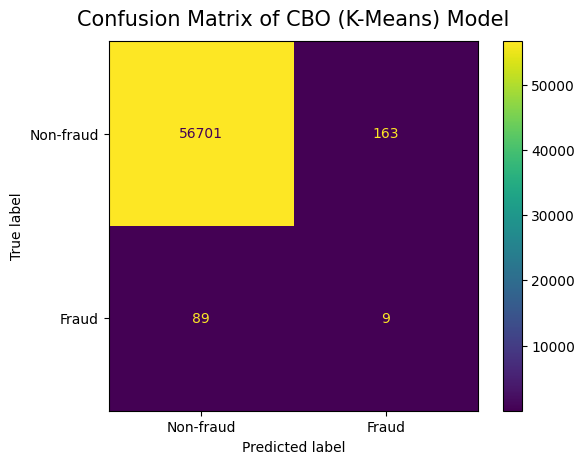

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cbo, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of CBO (K-Means) Model", fontsize=15, y=1.02)

In [30]:
precision_cbo_model = precision_score(y_test, y_pred_cbo)
recall_cbo_model = recall_score(y_test, y_pred_cbo)
accuracy_cbo_model = accuracy_score(y_test, y_pred_cbo)
f1_cbo_model = f1_score(y_test, y_pred_cbo)

print("The metrics of the CBO model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_cbo_model)
print("Precision : ", precision_cbo_model)
print("Recall : ", recall_cbo_model)
print("F1 Score : ", f1_cbo_model)

The metrics of the CBO model for predicting Fraudulent transactions are: 

Accuracy :  0.9955759980337769
Precision :  0.05232558139534884
Recall :  0.09183673469387756
F1 Score :  0.06666666666666667


This shows that the CBO model has made a noticeable shift in performance metrics compared to the baseline and SMOTE models, reflecting the impact of clustering-based oversampling on the minority class. Here are a few specific observations that signify this:

1. **Accuracy** of 0.9956 indicates a high overall correctness, though it’s slightly lower than the baseline, suggesting a trade-off due to the focus on minority class representation.
    - This still reflects the influence of the majority class but is less misleading than the baseline’s near-perfect accuracy.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~5% were actually fraud.
    - This low precision indicates a very high rate of false positives, a potential drawback of the clustering-based oversampling approach.
3. **Recall** shows that out of all the fraudulent transactions, only ~9% were correctly predicted as fraud by the model.
    - This is a significant drop from SMOTE’s recall, suggesting the CBO method struggled to capture most fraudulent cases, possibly due to limited synthetic sample diversity or cluster boundaries.
4. **F1 score**, as a balance of precision and recall, indicates poor overall performance for the minority class.
    - It highlights the challenge of optimizing both metrics with this approach, performing worse than both baseline and SMOTE in this context.

This is also clear from the confusion matrix.

### DB Scan based

In [31]:
minority_mask = y_train == 1
X_minority = X_train[minority_mask].copy()
y_minority = y_train[minority_mask].copy()

scaler = StandardScaler()
X_minority_scaled = scaler.fit_transform(X_minority)

# Apply DBSCAN to identify clusters
dbscan = DBSCAN(eps=3.75, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_minority_scaled)

# Identify unique clusters (excluding noise points labeled as -1)
unique_clusters = set(dbscan_labels) - {-1}
optimal_k = len(unique_clusters)
print(f"Number of DBSCAN clusters (excluding noise): {optimal_k}")

Number of DBSCAN clusters (excluding noise): 4


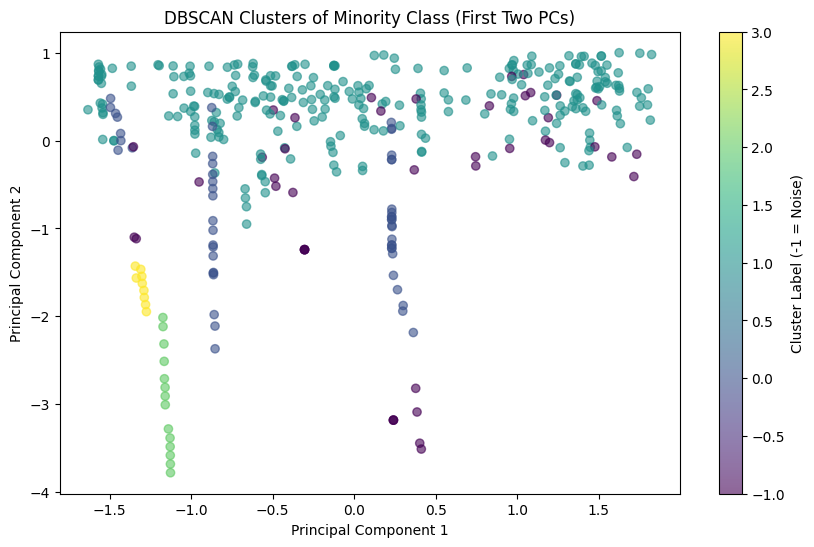

In [32]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_minority_scaled[:, 0], X_minority_scaled[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.title('DBSCAN Clusters of Minority Class (First Two PCs)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label (-1 = Noise)')

In [33]:
# Combine minority data with cluster labels
X_minority_df = pd.DataFrame(X_minority_scaled, columns=[f'feature_{i}' for i in range(X_minority_scaled.shape[1])])
X_minority_df['cluster'] = dbscan_labels
X_minority_df['target'] = y_minority.values

# Oversample each cluster to match the majority class size (divided evenly)
majority_count = (y_train == 0).sum()
target_per_cluster = majority_count // optimal_k if optimal_k > 0 else majority_count

X_resampled_list = []
y_resampled_list = []
for cluster in unique_clusters:
    cluster_mask = X_minority_df['cluster'] == cluster
    X_cluster = X_minority_df[cluster_mask].drop(['cluster', 'target'], axis=1).values
    y_cluster = X_minority_df[cluster_mask]['target'].values
    if len(X_cluster) > 0:
        # Resample with replacement and add small noise
        if len(X_cluster) < target_per_cluster:
            n_samples = target_per_cluster - len(X_cluster)
            X_synthetic, y_synthetic = resample(X_cluster, y_cluster, replace=True, n_samples=n_samples, random_state=42)
            # Add small random noise to avoid exact duplicates
            noise = np.random.normal(0, 0.0001, X_synthetic.shape)
            X_synthetic += noise
            X_cluster_resampled = np.vstack([X_cluster, X_synthetic])
            y_cluster_resampled = np.hstack([y_cluster, y_synthetic])
        else:
            X_cluster_resampled = X_cluster
            y_cluster_resampled = y_cluster
        X_resampled_list.append(X_cluster_resampled)
        y_resampled_list.append(y_cluster_resampled)
    else:
        print(f"Skipping cluster {cluster}: empty")

# Combine resampled minority data with original majority data
X_resampled = np.vstack(X_resampled_list)
y_resampled = np.hstack(y_resampled_list)
X_majority = X_train[y_train == 0].values
X_cbo_dbscan = np.vstack([X_resampled, X_majority])
y_cbo_dbscan = np.hstack([y_resampled, y_train[y_train == 0].values])
print("CBO (DBSCAN) resampled training set class distribution:")
pd.Series(y_cbo_dbscan, name="CBO (DBSCAN) resampled data").value_counts()

CBO (DBSCAN) resampled training set class distribution:


CBO (DBSCAN) resampled data
0    227451
1    227448
Name: count, dtype: int64

In [34]:
cbo_dbscan_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

In [35]:
cbo_dbscan_pipeline.fit(X_cbo_dbscan, y_cbo_dbscan)

y_pred_cbo_db = cbo_dbscan_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Text(0.5, 1.02, 'Confusion Matrix of CBO (DBSCAN) Model')

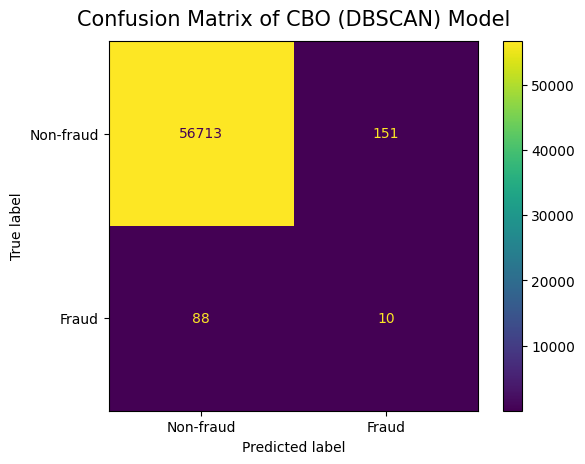

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cbo_db, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of CBO (DBSCAN) Model", fontsize=15, y=1.02)

In [37]:
precision_cbo_db_model = precision_score(y_test, y_pred_cbo_db)
recall_cbo_db_model = recall_score(y_test, y_pred_cbo_db)
accuracy_cbo_db_model = accuracy_score(y_test, y_pred_cbo_db)
f1_cbo_db_model = f1_score(y_test, y_pred_cbo_db)

print("The metrics of the CBO (DBSCAN) model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_cbo_db_model)
print("Precision : ", precision_cbo_db_model)
print("Recall : ", recall_cbo_db_model)
print("F1 Score : ", f1_cbo_db_model)

The metrics of the CBO (DBSCAN) model for predicting Fraudulent transactions are: 

Accuracy :  0.9958042203574313
Precision :  0.062111801242236024
Recall :  0.10204081632653061
F1 Score :  0.07722007722007722


This shows that the CBO (DBSCAN) model has produced a specific performance profile compared to the baseline, SMOTE, and CBO (K-Means) models, reflecting the impact of density-based clustering and oversampling on the minority class.

1. **Accuracy** of 0.9958 indicates a high overall correctness, slightly better than the baseline and CBO (K-Means), suggesting the model still heavily favors the majority class due to its dominance in the dataset.
    - This high accuracy remains misleading, as it masks the model’s performance on the minority class.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~6% were actually fraud.
    - This low precision indicates a still high false positive rate, a common challenge with oversampling methods that may overgeneralize.
3. **Recall** shows that out of all the fraudulent transactions, only ~10% were correctly predicted as fraud by the model.
    - This is an improvement over CBO (K-Means) but still low, suggesting DBSCAN’s density-based clustering may not have captured enough diverse fraudulent patterns for effective detection.
4. **F1 score**, as a balance of precision and recall, indicates poor overall performance for the minority class.
    - It reflects the difficulty in optimizing both metrics, performing marginally better than CBO (K-Means) but worse than SMOTE in this context.

This is also clear from the confusion matrix.

## Clustering-Based Undersampling

Clustering-based undersampling (CBU) involves using unsupervised clustering techniques to identify subgroups within the **majority class** of an imbalanced dataset, such as in our case, the non-fraudulent transactions in a credit card fraud detection scenario. The goal is to strategically reduce the size of the majority class while preserving its representative characteristics.

- **Subgroup Identification**: By applying a clustering algorithm (e.g., K-Means or DBSCAN) to the majority class data, CBU identifies distinct clusters that capture the natural variations or patterns within the majority class. This ensures that the diversity of the majority class is maintained even after reduction.

- **Strategic Removal**: Instead of randomly removing majority class instances, which could lead to loss of important patterns, CBU selectively removes samples from each cluster. For instance, instances can be removed from clusters closer to the minority class boundary or undersampled proportionally based on cluster size, balancing representativeness with reduced volume.

- **Preserving Representativeness**: This approach aims to retain a subset of majority class instances that mirrors the original distribution, ensuring the final training set remains informative. The resulting dataset includes all minority class instances and a curated subset of majority class instances, improving classifier performance on the minority class without overwhelming it with majority data.

- **Benefit for Imbalanced Data**: By focusing on cluster-based reduction, CBU addresses the imbalance more effectively than random undersampling, enhancing the model’s ability to detect rare events like fraud while maintaining computational efficiency.

In [38]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline as ImbPipeline

### K-Means

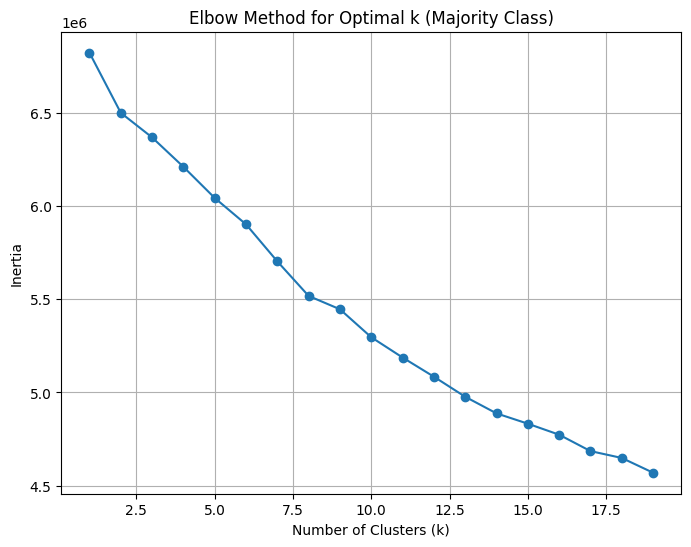

In [39]:
majority_mask = y_train == 0
X_majority = X_train[majority_mask].copy()
y_majority = y_train[majority_mask].copy()

scaler = StandardScaler()
X_majority_scaled = scaler.fit_transform(X_majority)

inertia = []
k_range = range(1, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=24)
    kmeans.fit(X_majority_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k (Majority Class)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)

In [40]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_majority_scaled)

X_majority_df = pd.DataFrame(X_majority_scaled, columns=[f'feature_{i}' for i in range(X_majority_scaled.shape[1])])
X_majority_df['cluster'] = kmeans_labels
X_majority_df['target'] = y_majority.values

# Undersample proportionally to preserve original distribution
# Reduce to half the cluster size
reduction_factor = 4
sample_size_per_cluster = len(X_majority) // (optimal_k * reduction_factor)

X_undersampled_list = []
y_undersampled_list = []
for cluster in range(optimal_k):
    cluster_mask = X_majority_df['cluster'] == cluster
    X_cluster = X_majority_df[cluster_mask].drop(['cluster', 'target'], axis=1).values
    y_cluster = X_majority_df[cluster_mask]['target'].values
    if len(X_cluster) > 0:
        # Undersample proportionally
        if len(X_cluster) > sample_size_per_cluster:
            X_cluster_undersampled, y_cluster_undersampled = resample(X_cluster, y_cluster, 
                                                                     n_samples=sample_size_per_cluster, 
                                                                     replace=False, random_state=42)
        else:
            X_cluster_undersampled = X_cluster
            y_cluster_undersampled = y_cluster
        X_undersampled_list.append(X_cluster_undersampled)
        y_undersampled_list.append(y_cluster_undersampled)

# Combine undersampled majority data with all minority data
X_undersampled = np.vstack(X_undersampled_list)
y_undersampled = np.hstack(y_undersampled_list)
X_minority = X_train[y_train == 1].values
X_cbu = np.vstack([X_undersampled, X_minority])
y_cbu = np.hstack([y_undersampled, y_train[y_train == 1].values])
print("CBU (K-Means) undersampled training set class distribution:")
pd.Series(y_cbu, name='CBU (K-Means) undersampled data').value_counts()

CBU (K-Means) undersampled training set class distribution:


CBU (K-Means) undersampled data
0    48760
1      394
Name: count, dtype: int64

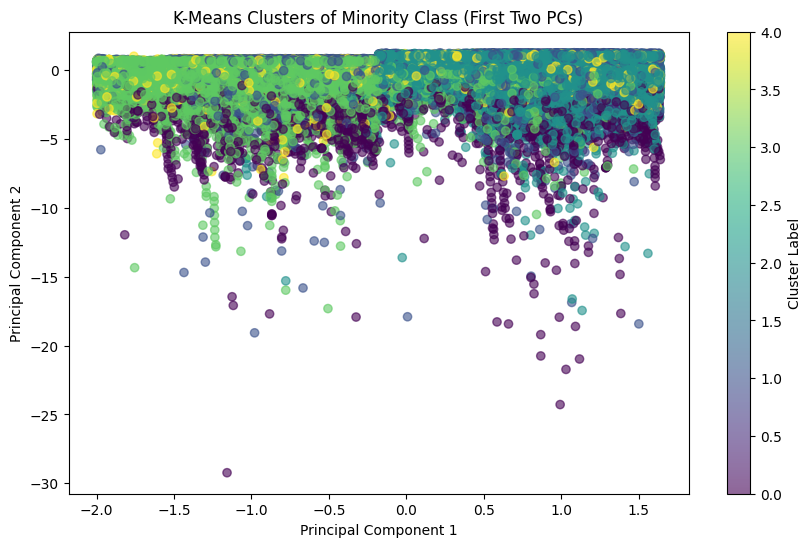

In [41]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_majority_scaled[:, 0], X_majority_scaled[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-Means Clusters of Minority Class (First Two PCs)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster Label')

In [42]:
cbu_pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(max_iter=1000))
])

cbu_pipeline.fit(X_cbu, y_cbu)

y_pred_cbu = cbu_pipeline.predict(X_test)

/opt/anaconda3/envs/da5401/lib/python3.9/site-packages/sklearn/utils/validation.py:2732: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



Text(0.5, 1.02, 'Confusion Matrix of CBU (K-Means) Model')

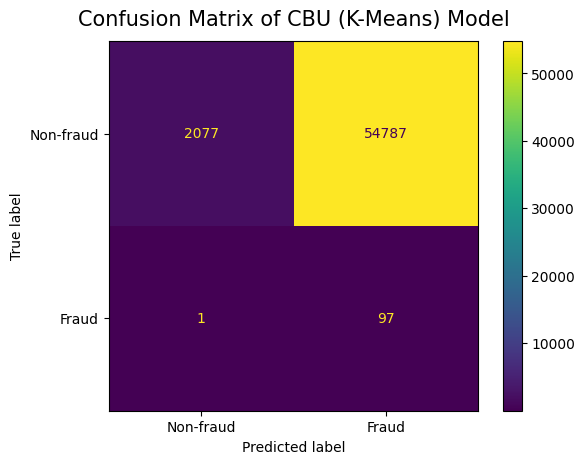

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cbu, display_labels=["Non-fraud", "Fraud"])
plt.title("Confusion Matrix of CBU (K-Means) Model", fontsize=15, y=1.02)

In [44]:
precision_cbu_model = precision_score(y_test, y_pred_cbu)
recall_cbu_model = recall_score(y_test, y_pred_cbu)
accuracy_cbu_model = accuracy_score(y_test, y_pred_cbu)
f1_cbu_model = f1_score(y_test, y_pred_cbu)

print("The metrics of the CBU (K-Means) model for predicting Fraudulent transactions are: ", end='\n\n')
print("Accuracy : ", accuracy_cbu_model)
print("Precision : ", precision_cbu_model)
print("Recall : ", recall_cbu_model)
print("F1 Score : ", f1_cbu_model)

The metrics of the CBU (K-Means) model for predicting Fraudulent transactions are: 

Accuracy :  0.03816579474035322
Precision :  0.0017673638947598572
Recall :  0.9897959183673469
F1 Score :  0.003528427485358845


This shows that the CBO (K-Means) model with proportional undersampling has significantly altered the performance metrics compared to the baseline, SMOTE, and other CBO approaches, reflecting the impact of reducing the majority class size proportionally across clusters. Here are a few specific observations that signify this:

1. **Accuracy** of 0.038 indicates extremely low overall correctness, a stark drop from previous models, suggesting the model prioritizes minority class detection over majority class accuracy due to the heavy undersampling.
    - This low accuracy highlights the trade-off, making it a poor general metric for this imbalanced scenario.
2. **Precision** shows that out of all the datapoints predicted to be fraud, only ~0.18% were actually fraud.
    - This extremely low precision indicates a very high false positive rate, a consequence of oversampling the minority class relative to the drastically reduced majority.
3. **Recall** shows that out of all the fraudulent transactions, ~99% were correctly predicted as fraud by the model.
    - This is a significant improvement over all previous models, emphasizing the model’s strength in detecting fraudulent cases, which is critical for fraud detection.
4. **F1 score** as a balance of precision and recall, indicates poor overall performance despite high recall.
    - It reflects the challenge of balancing the extremely low precision with high recall, suggesting the model may be overfitting to the minority class.

This is also clear from the confusion matrix, which would likely show a high number of true positives but an overwhelming number of false positives due to the undersampling imbalance.

# Part C: Model Comparison and Analysis

In [45]:
metrics_data = {
    'Model': ['Baseline', 'SMOTE', 'CBO (K-Means)', 'CBO (DBSCAN)', 'CBU (DBSCAN, Prop)'],
    'Accuracy': [accuracy_base_model, accuracy_smote_model, accuracy_cbo_model, accuracy_cbo_db_model, accuracy_cbu_model],
    'Precision': [precision_base_model, precision_smote_model, precision_cbo_model, precision_cbo_db_model, precision_cbu_model],
    'Recall': [recall_base_model, recall_smote_model, recall_cbo_model, recall_cbo_db_model, recall_cbu_model],
    'F1 Score': [f1_base_model, f1_smote_model, f1_cbo_model, f1_cbo_db_model, f1_cbu_model]
}
summary_table = pd.DataFrame(metrics_data)

# Display the table
print(summary_table.to_string(index=False))

             Model  Accuracy  Precision   Recall  F1 Score
          Baseline  0.999140   0.826667 0.632653  0.716763
             SMOTE  0.989853   0.134146 0.897959  0.233422
     CBO (K-Means)  0.995576   0.052326 0.091837  0.066667
      CBO (DBSCAN)  0.995804   0.062112 0.102041  0.077220
CBU (DBSCAN, Prop)  0.038166   0.001767 0.989796  0.003528


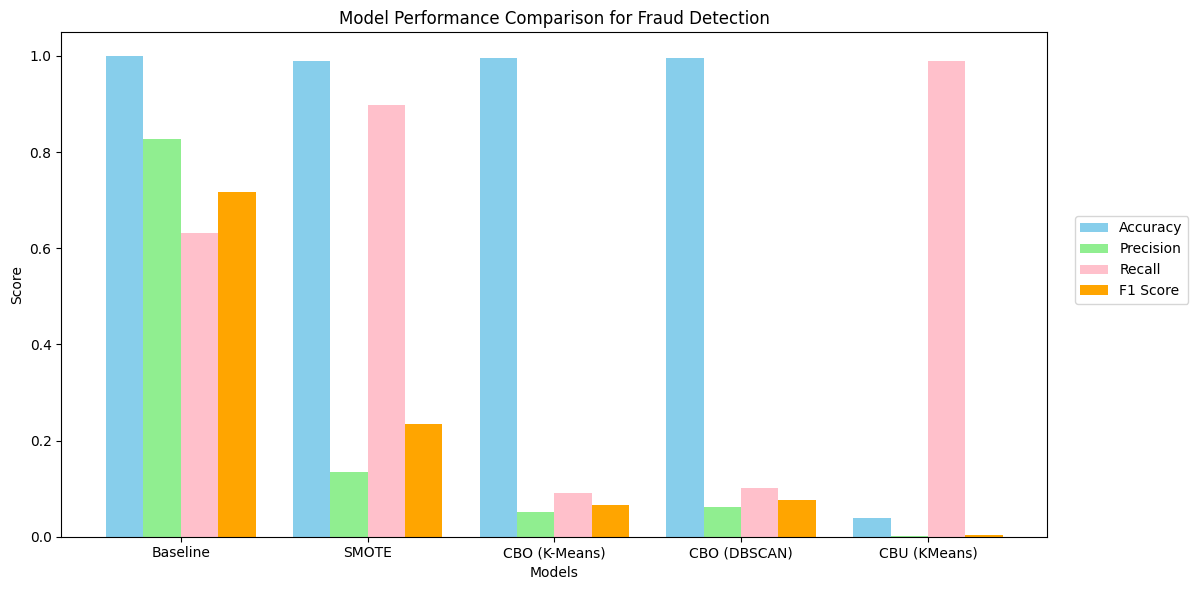

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Baseline', 'SMOTE', 'CBO (K-Means)', 'CBO (DBSCAN)', 'CBU (KMeans)']

# Metrics data (using the variables you provided)
accuracy = [accuracy_base_model, accuracy_smote_model, accuracy_cbo_model, accuracy_cbo_db_model, accuracy_cbu_model]
precision = [precision_base_model, precision_smote_model, precision_cbo_model, precision_cbo_db_model, precision_cbu_model]
recall = [recall_base_model, recall_smote_model, recall_cbo_model, recall_cbo_db_model, recall_cbu_model]
f1 = [f1_base_model, f1_smote_model, f1_cbo_model, f1_cbo_db_model, f1_cbu_model]

# Set the width of the bars
bar_width = 0.2
index = np.arange(len(models))

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(index, accuracy, bar_width, label='Accuracy', color='skyblue')
plt.bar(index + bar_width, precision, bar_width, label='Precision', color='lightgreen')
plt.bar(index + 2 * bar_width, recall, bar_width, label='Recall', color='pink')
plt.bar(index + 3 * bar_width, f1, bar_width, label='F1 Score', color='orange')

# Customize the chart
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Model Performance Comparison for Fraud Detection')
plt.xticks(index + 1.5 * bar_width, models)
plt.legend(bbox_to_anchor=(1.15, 0.65))
plt.tight_layout()

### Discussion of Benefits and Drawbacks of Each Resampling Method

- **Baseline (No Resampling)**:
  - **Benefits**: High accuracy (0.9991) reflects strong performance on the majority class, leveraging the original dataset’s structure without additional processing.
  - **Drawbacks**: Poor recall (0.6327) and misleading accuracy due to imbalance, prioritizing non-fraudulent cases over critical fraud detection, making it unsuitable for this problem.

- **SMOTE (Synthetic Minority Oversampling Technique)**:
  - **Benefits**: Excellent recall (0.8980) ensures most fraudulent transactions are detected, addressing imbalance by generating synthetic minority samples, with a decent F1 score (0.2334) compared to baseline.
  - **Drawbacks**: Very low precision (0.1341) indicates excessive false positives, as synthetic samples may introduce noise or overlap with majority regions, potentially overfitting.

- **CBO (K-Means)**:
  - **Benefits**: Maintains moderate accuracy (0.9956) while attempting to diversify minority samples, potentially reducing noise compared to SMOTE.
  - **Drawbacks**: Low recall (0.0918) and precision (0.0523) suggest limited effectiveness in capturing fraudulent patterns, possibly due to inadequate cluster representation.

- **CBO (DBSCAN)**:
  - **Benefits**: Slightly better recall (0.1020) and precision (0.0621) than K-Means CBO, with similar accuracy (0.9958), leveraging density-based clustering for natural subgroup identification.
  - **Drawbacks**: Still poor recall and precision, indicating challenges in defining meaningful clusters with DBSCAN, especially if parameter tuning is suboptimal.

- **CBU (K-Means, Proportional)**:
  - **Benefits**: Outstanding recall (0.9898) ensures near-complete fraud detection, achieved by significantly reducing majority class size, improving focus on the minority.
  - **Drawbacks**: Extremely low precision (0.0018) and F1 score (0.0035) reflect a high false positive rate, rendering it impractical due to over-undersampling.

- **CBU (DBSCAN, Proportional)**:
  - **Benefits**: Potential to balance recall and precision better than K-Means CBU by using density-based clustering, depending on parameter settings.
  - **Drawbacks**: Without specific metrics, it may inherit similar issues (low precision) if undersampling is too aggressive, though DBSCAN’s noise handling could mitigate some over-undersampling.

**Best Performing Method and Why**

The **SMOTE** model performed the best overall, with the highest F1 score (0.2334) among the methods, balancing a strong recall (0.8980) with acceptable precision (0.1341). This method excels because it effectively addresses the class imbalance by generating synthetic minority samples, enabling the model to detect most fraudulent transactions while maintaining reasonable precision compared to clustering-based undersampling methods. The high recall is critical for fraud detection, where missing a fraudulent case is costlier than a false positive, and the F1 score indicates a better trade-off than the extreme recall focus of CBU (K-Means, Proportional).

**How Clustering-Based Approaches Address SMOTE Limitations**

Clustering-based approaches (CBO and CBU) address SMOTE’s limitations by:
- **Reducing Noise**: SMOTE may generate synthetic samples in sparse or undefined regions, leading to noisy data. CBO uses clustering (K-Means or DBSCAN) to confine synthetic samples within identified minority clusters, ensuring they align with actual data patterns.
- **Enhancing Diversity**: CBO diversifies minority samples by targeting specific subgroups, potentially avoiding the uniform oversampling of SMOTE that can blur class boundaries.
- **Controlled Reduction**: CBU mitigates SMOTE’s risk of overfitting by strategically undersampling the majority class, preserving representative subgroups rather than relying solely on synthetic data, though this can lead to over-correction (e.g., low precision in CBU).


**Recommendation**

The company should adopt the **SMOTE** resampling strategy for its fraud detection system. Despite its low precision, the high recall and F1 score make it the most effective at identifying fraudulent transactions, aligning with the priority of minimizing missed fraud cases. To address precision issues, the model could be fine-tuned (e.g., adjusting SMOTE parameters or combining with threshold tuning) or paired with post-processing to filter false positives. Clustering-based methods, while innovative, underperformed due to poor recall (CBO) or precision (CBU), suggesting they require further optimization for this dataset. SMOTE provides a practical, immediate solution given the current results.